# Project Statement

- This dataset provides an in-depth look into the global CO2 emissions at the country-level, allowing for a better understanding of how much each country contributes to the global cumulative human impact on climate. 
- It contains information on total emissions as well as from coal, oil, gas, cement production and flaring, and other sources. 
- The data also provides a breakdown of per capita CO2 emission per country - showing which countries are leading in pollution levels and identifying potential areas where reduction efforts should be concentrated. 
- This dataset is essential for anyone who wants to get informed about their own environmental footprint or conduct research on international development trends.

## Project Dictionary

df1: Mt CO2
df2: per capita
df3: sources
Country:	The name of the country. (String)
ISO 3166-1 alpha-3:	The three-letter code for the country. (String)
Year:	The year of the data. (Integer)
Total:	The total amount of CO2 emissions for the country in the given year. (Float)
Coal:	The amount of CO2 emissions from coal for the country in the given year. (Float)
Oil:	The amount of CO2 emissions from oil for the country in the given year. (Float)
Gas:	The amount of CO2 emissions from gas for the country in the given year. (Float)
Cement:	The amount of CO2 emissions from cement production for the country in the given year. (Float)
Flaring:	The amount of CO2 emissions from flaring operations for the country in the given year. (Float)
Other:	The amount of CO2 emissions from other sources for the country in the given year. (Float)
Per Capita:	The amount of CO2 emissions per capita for the country in the given year. (Float)

## Project based on data and code from:
Data Source Citation:
    Andrew, Robbie M., & Peters, Glen P. (2022). 
    The Global Carbon Project's fossil CO2 emissions dataset (2022v27) [Data set]. 
    Zenodo. https://zenodo.org/records/13981696

In [1]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Bibliotecas para visualização

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as po
import plotly.graph_objs as pg

import os

In [2]:
# definir diretorio e parametros iniciais.

os.chdir("E:/DS/GIT/Proj_Git/CO2")
print (os.getcwd())

# table limits
pd.set_option('display.max_columns', None) # coluna
pd.set_option('display.max_rows', 10) # linha
# Formatar numeros para que tenham duas casas decimais.
pd.options.display.float_format = '{:.2f}'.format

E:\DS\GIT\Proj_Git\CO2


In [3]:
# ler arquivos fonte

df1 = pd.read_csv('GCB2024v17_MtCO2_flat.csv')
df2= pd.read_csv('GCB2024v17_percapita_flat.csv')
df3 = pd.read_csv('GCB2024v17_sources_flat.csv')


df1.describe()

,UN M49,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,60828.00,60828.00,23863.00,18412.00,21861.00,14660.00,24479.00,13026.00,2273.00,22913.00
mean,459.35,1886.50,151.90,90.75,57.48,36.85,3.95,3.04,8.35,3.91
std,318.51,79.10,1381.70,675.31,528.41,315.15,49.12,22.54,34.79,15.26
min,4.00,1750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,214.00,1818.00,0.25,0.04,0.10,0.00,0.00,0.00,0.00,0.18
50%,439.00,1886.50,2.84,1.00,1.14,0.01,0.00,0.00,0.75,1.01
75%,660.00,1955.00,24.33,11.06,9.35,4.47,0.41,0.20,3.29,4.28
max,1912.00,2023.00,37791.57,15401.22,12411.97,7922.98,1696.31,435.26,305.38,781.00


In [4]:
df2.describe()

,UN M49,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
count,60828.00,60828.00,17535.00,12889.00,17250.00,10218.00,15375.00,9667.00,1725.00
mean,459.35,1886.50,4.82,1.51,2.76,1.18,0.09,0.40,0.09
std,318.51,79.10,17.14,2.72,16.45,3.50,0.14,3.65,0.06
min,4.00,1750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,214.00,1818.00,0.37,0.02,0.14,0.00,0.00,0.00,0.04
50%,439.00,1886.50,1.71,0.30,0.76,0.08,0.03,0.00,0.07
75%,660.00,1955.00,5.71,1.89,2.62,0.99,0.12,0.05,0.12
max,1912.00,2023.00,781.00,34.23,781.00,53.31,2.57,113.26,0.35


In [6]:
df3.describe()

,UN M49,Year
count,60828.00,60828.00
mean,459.35,1886.50
std,318.51,79.10
min,4.00,1750.00
25%,214.00,1818.00
50%,439.00,1886.50
75%,660.00,1955.00
max,1912.00,2023.00


In [7]:
df1.isna().sum()

Country                   0
ISO 3166-1 alpha-3      822
UN M49                    0
Year                      0
Total                 36965
                      ...  
Gas                   46168
Cement                36349
Flaring               47802
Other                 58555
Per Capita            37915
Length: 12, dtype: int64

In [8]:
co2 = df1.copy()
per_capita = df2.copy()
sources = df3.copy()



In [9]:
# co2.tail()

co2.Country.value_counts()

co2.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'UN M49', 'Year', 'Total', 'Coal',
       'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [10]:
# filtro para remover as linhas em que Country=Global
# code: df = df[df['Team'] != 'C']

co2 = co2[co2['Country'] != 'Global']

In [11]:
dfx = co2[['Country', 'Year', 'Total']]
dfx.head()

,Country,Year,Total
0,Afghanistan,1750,NaN
1,Afghanistan,1751,NaN
2,Afghanistan,1752,NaN
3,Afghanistan,1753,NaN
4,Afghanistan,1754,NaN


In [12]:
dfx.groupby(['Country']).Total.sum().sort_values(ascending=False)[:10]

Country
USA              431852.73
China            272531.54
Russia           121266.53
Germany           94582.29
United Kingdom    79777.71
Japan             68764.53
India             62870.03
France            39685.16
Canada            35156.32
Ukraine           31079.18
Name: Total, dtype: float64

## Exploratory data analysis

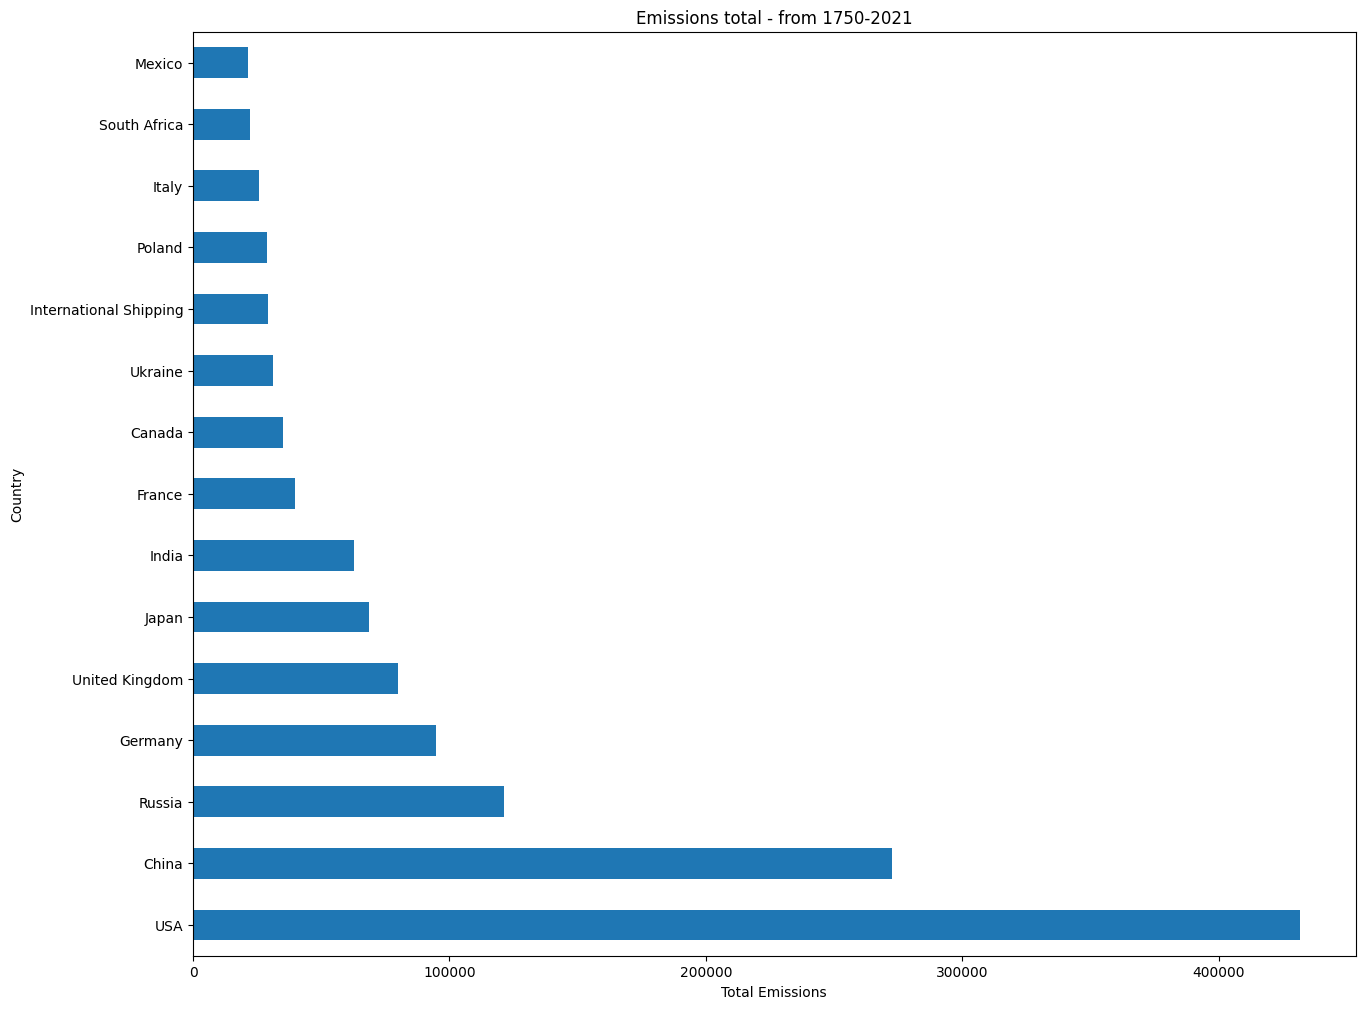

In [13]:
# Preloaded DataFrame
country_total = dfx.groupby(['Country']).Total.sum().sort_values(ascending=False)[:15]

# Sets the size of the figure
plt.figure(figsize=(15, 12))

# Create the ax object before plotting the data
ax = country_total.plot(kind='barh')

# Set the chart title
ax.set_title('Emissions total - from 1750-2021')

# Add labels to axes
ax.set_xlabel('Total Emissions')
ax.set_ylabel('Country')

# Display the chart
plt.show()

In [16]:
TMI= dfx.query('Country == "International Shipping" ')
TMI

,Country,Year,Total
60006,International Shipping,1750,NaN
60007,International Shipping,1751,NaN
60008,International Shipping,1752,NaN
60009,International Shipping,1753,NaN
60010,International Shipping,1754,NaN
...,...,...,...
60275,International Shipping,2019,627.17
60276,International Shipping,2020,583.68
60277,International Shipping,2021,599.91
60278,International Shipping,2022,595.23


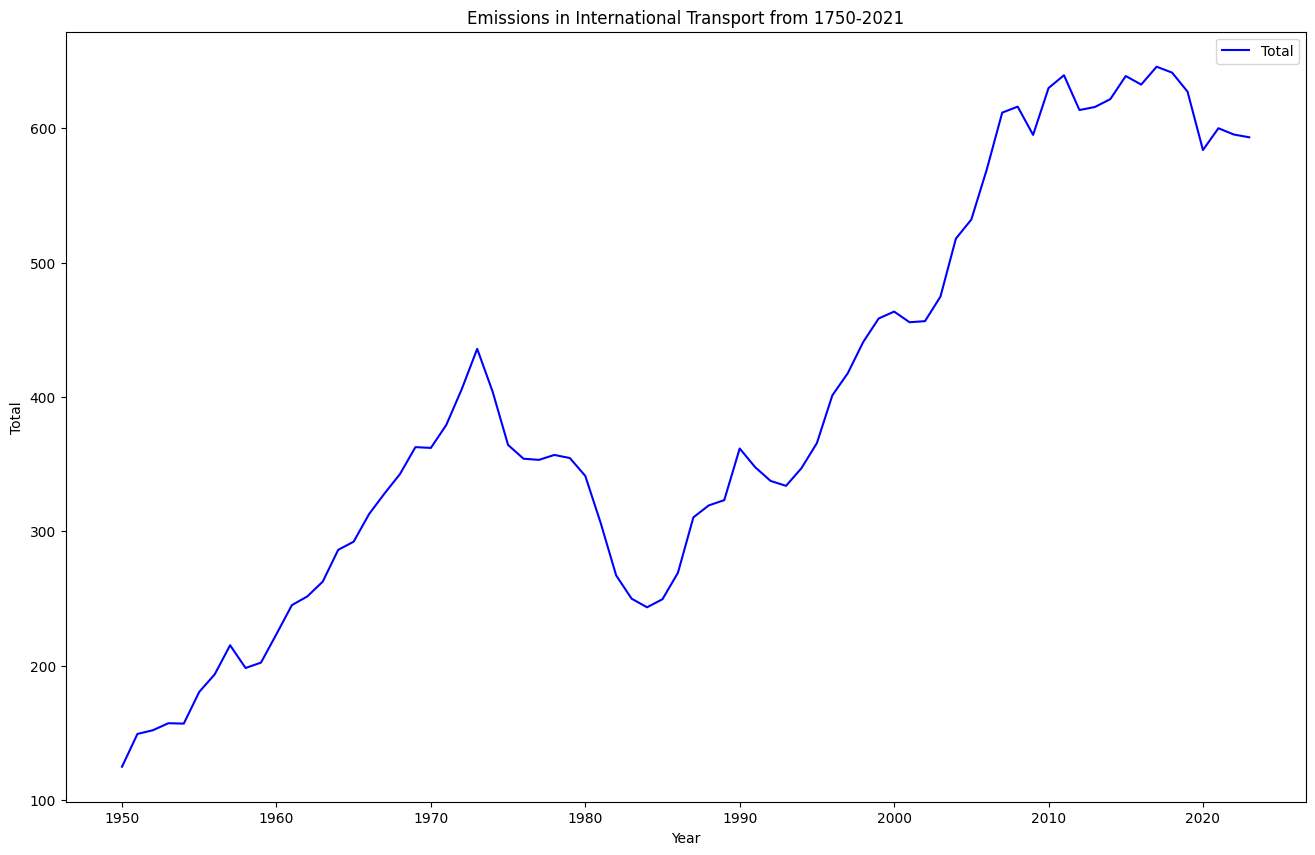

In [17]:
# graphic - Emissions in International Transport from 1750-2021
color = 'blue'
ax = TMI.plot(x='Year', y= 'Total', figsize=(16,10), color=color)
ax.set_ylabel('Total')
ax.set_title('Emissions in International Transport from 1750-2021')
plt.show()

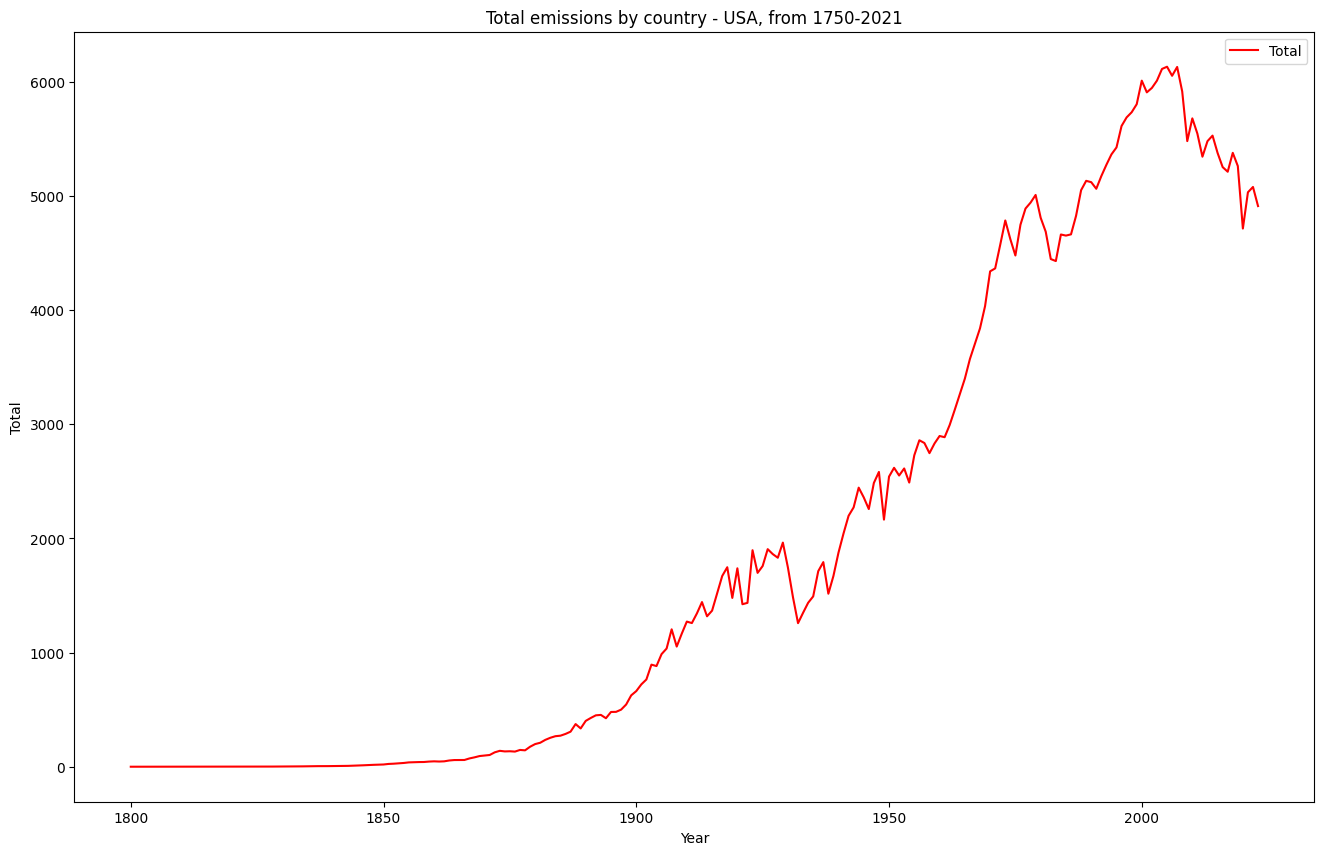

In [18]:
USA= dfx.query('Country == "USA" ')

color = 'red'
ax = USA.plot(x='Year', y= 'Total', figsize=(16,10), color=color)
ax.set_ylabel('Total')
ax.set_title('Total emissions by country - USA, from 1750-2021')
plt.show()

In [21]:
ddt = co2.copy()
ddt.isna().sum()
ddt.head()

,Country,ISO 3166-1 alpha-3,UN M49,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,4,1750,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,Afghanistan,AFG,4,1751,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2,Afghanistan,AFG,4,1752,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3,Afghanistan,AFG,4,1753,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
4,Afghanistan,AFG,4,1754,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN


<Figure size 2000x1600 with 0 Axes>

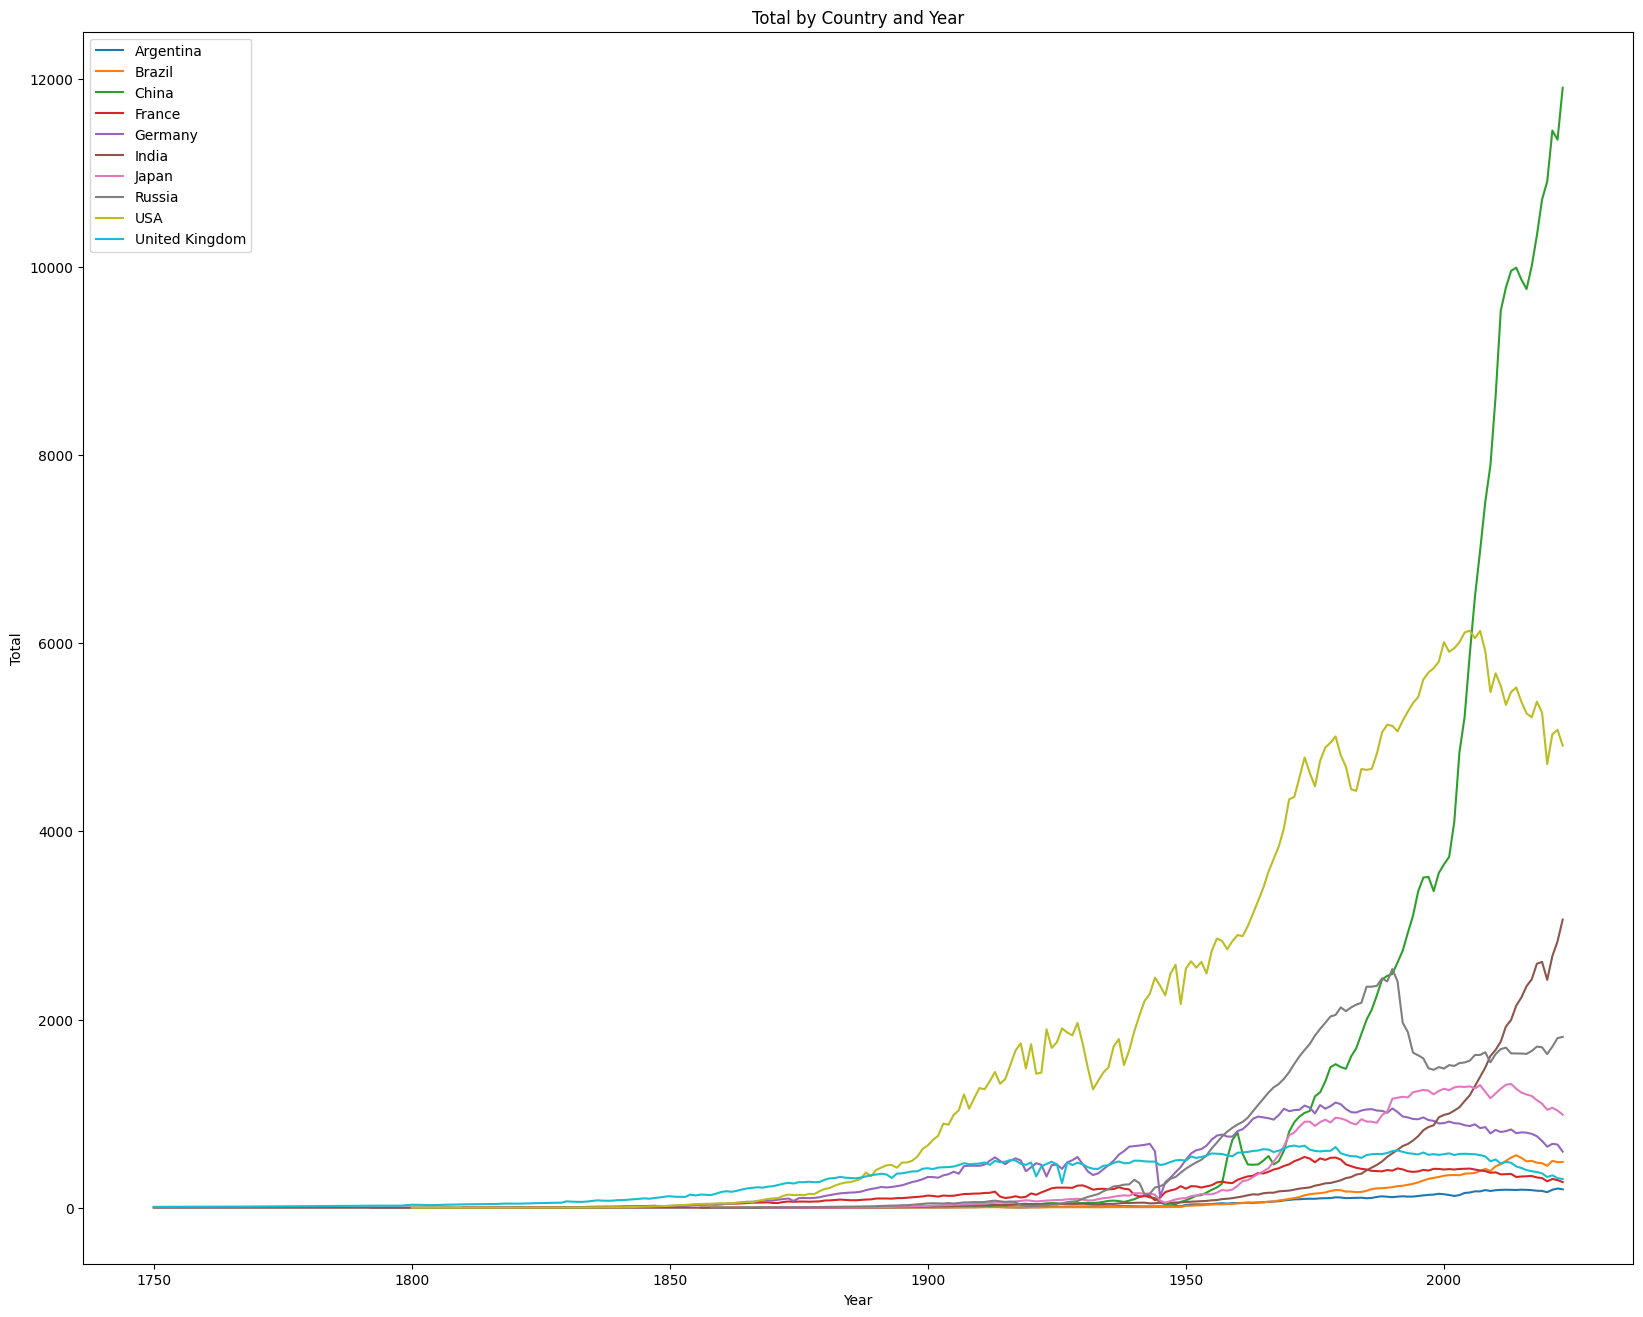

In [22]:
plt.figure(figsize=(20,16))
# create a data frame from the data

plt.figure(figsize=(20,16))
# create a DataFrame from the data

df = ddt[ddt['Country'].isin(['USA', 'China','Russia','Germany','United Kingdom','Japan','India','France','Brazil', 'Argentina'])]
# group the data by country
grouped = df.groupby("Country")

# plot the line graph for each country
for name, group in grouped:
    plt.plot(group['Year'], group['Total'], label=name)

# add a title, x-axis label, and y-axis label
plt.title('Total by Country and Year')
plt.xlabel('Year')
plt.ylabel('Total')

# add a legend
plt.legend()


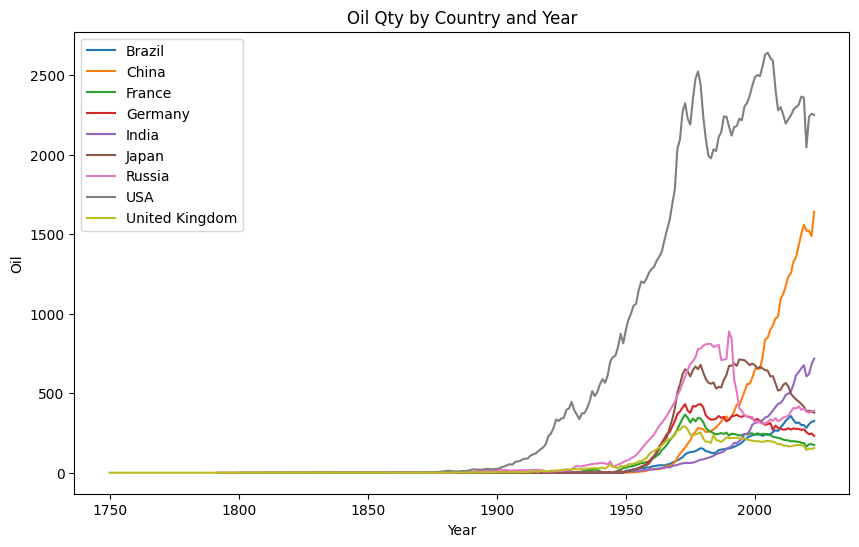

In [23]:
plt.figure(figsize=(10,6))
# create a DataFrame from the data

df = ddt[ddt['Country'].isin(['USA', 'China','Russia','Germany','United Kingdom','Japan','India','France','Brazil'])]
# group the data by country
grouped = df.groupby("Country")

# plot the line graph for each country
for name, group in grouped:
    plt.plot(group['Year'], group['Oil'], label=name)

# add a title, x-axis label, and y-axis label
plt.title('Oil Qty by Country and Year')
plt.xlabel('Year')
plt.ylabel('Oil')

# add a legend
plt.legend()

# show the plot
plt.show()

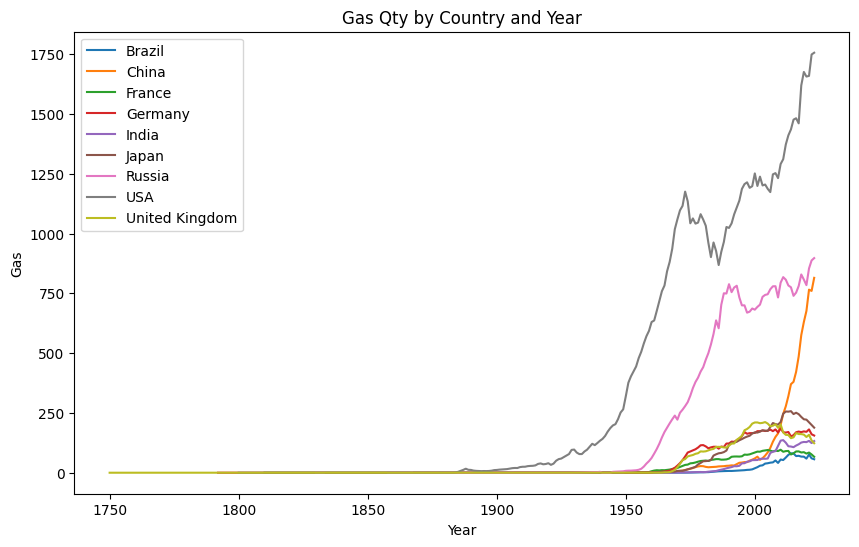

In [24]:
plt.figure(figsize=(10,6))
# create a DataFrame from the data

df = ddt[ddt['Country'].isin(['USA', 'China','Russia','Germany','United Kingdom','Japan','India','France','Brazil'])]
# group the data by country
grouped = df.groupby("Country")

# plot the line graph for each country
for name, group in grouped:
    plt.plot(group['Year'], group['Gas'], label=name)

# add a title, x-axis label, and y-axis label
plt.title('Gas Qty by Country and Year')
plt.xlabel('Year')
plt.ylabel('Gas')

# add a legend
plt.legend()

# show the plot
plt.show()

## EDA Summary

1. The horizontal bar chat shows a visualisation of the USA being the country with the highest emission rate followed by China (in terms of total cumulative emissions, from 1750-2021).

2. The USA also leads in the summed amount of emissions for Oil and Gas.

3. International transport displays almost zero emission rate.

4. Nigeria compared to the other 10 country elements has the least Oil emission plot.

5. China has the highest yearly total emissions from about the year 2000. 

## Per Capita Modelling

### Importing ML Algorithms

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# To disable warning
import warnings
warnings.filterwarnings('ignore')

In [26]:
df['Per Capita'].nunique()

1656

In [27]:
df.shape

(2466, 12)

In [28]:
#Selecting Target
y = df['Per Capita']
y.isna().sum()
y.fillna(0, inplace=True)
y

7398     0.00
7399     0.00
7400     0.00
7401     0.00
7402     0.00
         ... 
57535   15.74
57536   14.03
57537   14.93
57538   15.01
57539   14.45
Name: Per Capita, Length: 2466, dtype: float64

In [29]:
# Choosing Training and Testing dataset
X = df.drop(['Per Capita','ISO 3166-1 alpha-3','Country'], axis=1)
# X.head()
X.fillna(0, inplace=True)
X

,UN M49,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
7398,76,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7399,76,1751,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7400,76,1752,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7401,76,1753,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7402,76,1754,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
57535,840,2019,5262.15,1071.67,2361.00,1675.47,40.90,88.44,24.68
57536,840,2020,4714.63,877.92,2047.54,1656.25,40.69,67.75,24.47
57537,840,2021,5032.21,1004.76,2238.88,1659.13,41.31,63.29,24.84
57538,840,2022,5078.87,942.36,2258.47,1748.50,41.42,63.29,24.84


#### Train_Test_Split

In [30]:
# Split into training and testing with split ratio of 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

#### Optimal Training and Testing Model Determination

In [31]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression RMSE:", lr_rmse)


Linear Regression MSE: 5.366227339336612
Linear Regression RMSE: 2.316511890609805


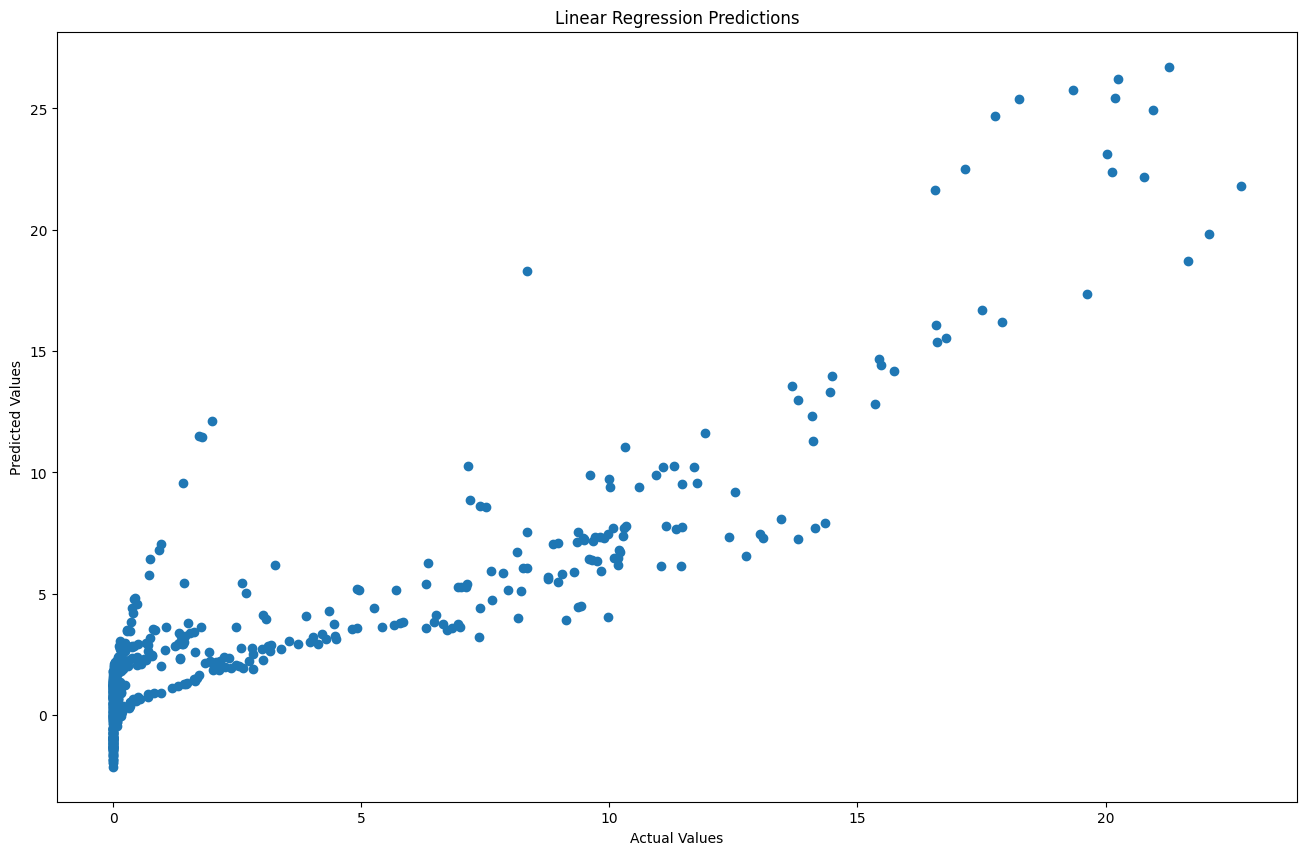

In [32]:
# Plot actual vs predicted values
plt.figure(figsize=(16,10))
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.show()


Decision Tree Regression MSE: 0.19288153290118623
Decision Tree Regression RMSE: 0.4391828012356429


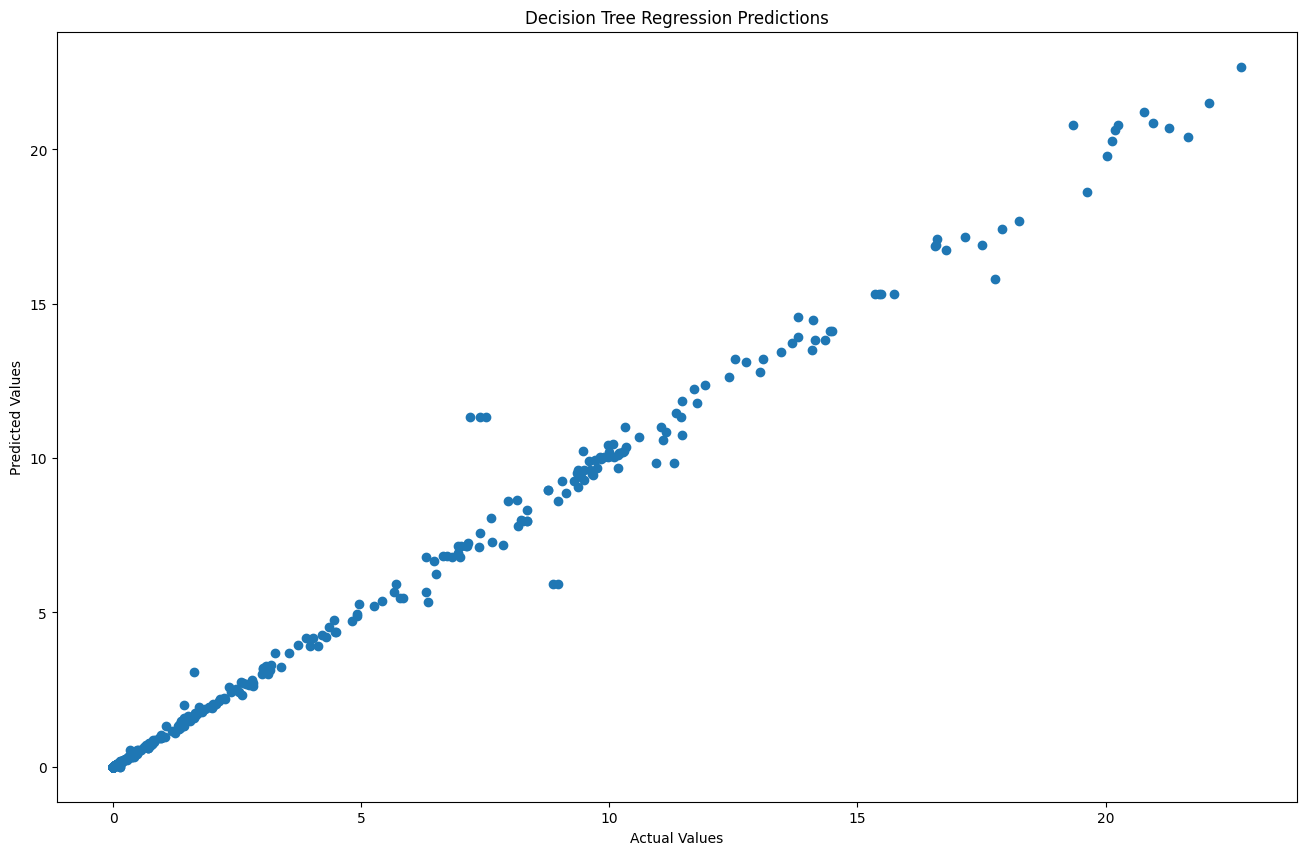

In [33]:
# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train, y_train)
dt_reg_pred = dt_reg.predict(X_test)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
dt_reg_rmse = np.sqrt(dt_reg_mse)
print("Decision Tree Regression MSE:", dt_reg_mse)
print("Decision Tree Regression RMSE:", dt_reg_rmse)

# Plot actual vs predicted values
plt.figure(figsize=(16,10))
plt.scatter(y_test, dt_reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression Predictions')
plt.show()

In [34]:
# Polynomial Regression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_poly_train)
poly_reg_pred = poly_reg.predict(X_poly_test)
poly_reg_mse = mean_squared_error(y_poly_test, poly_reg_pred)
poly_reg_rmse = np.sqrt(poly_reg_mse)
print("Polynomial Regression MSE:", poly_reg_mse)
print("Polynomial Regression RMSE:", poly_reg_rmse)


Polynomial Regression MSE: 1.1488534732934816
Polynomial Regression RMSE: 1.0718458253375256


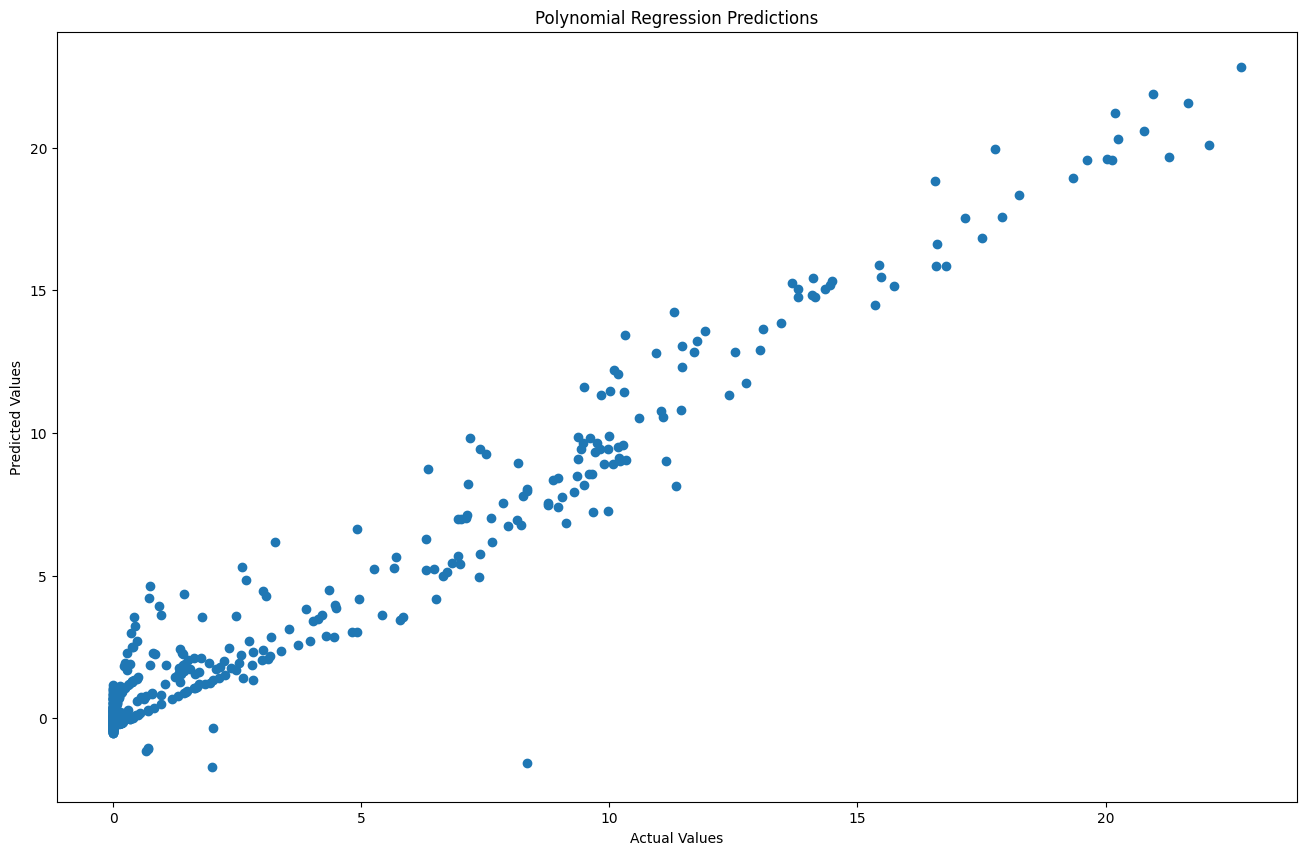

In [35]:
# Plot actual vs predicted values
plt.figure(figsize=(16,10))
plt.scatter(y_test, poly_reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Predictions')
plt.show()


In [36]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
rf_reg_rmse = np.sqrt(rf_reg_mse)
print("Random Forest Regression MSE:", rf_reg_mse)
print("Random Forest Regression RMSE:", rf_reg_rmse)



Random Forest Regression MSE: 0.09259248664189768
Random Forest Regression RMSE: 0.30429013563028573


In [37]:
#when i first ran the scatterplot below, it displayed a value error of x & y not being of equal size
#To solve this problem, I checked the shape, 
#Next below, I'm gonna slice the y-value so that it's the same as the y-pred
print(y.shape)
print(rf_reg_pred.shape)


(2466,)
(494,)


In [46]:
#Slicing my y values so that it has the same shape as my y-pred
y = y[:490]
rf_reg_pred = rf_reg_pred[:490]

In [47]:
print("Tamanho de y:", len(y))
print("Tamanho de rf_reg_pred:", len(rf_reg_pred))

Tamanho de y: 490
Tamanho de rf_reg_pred: 490


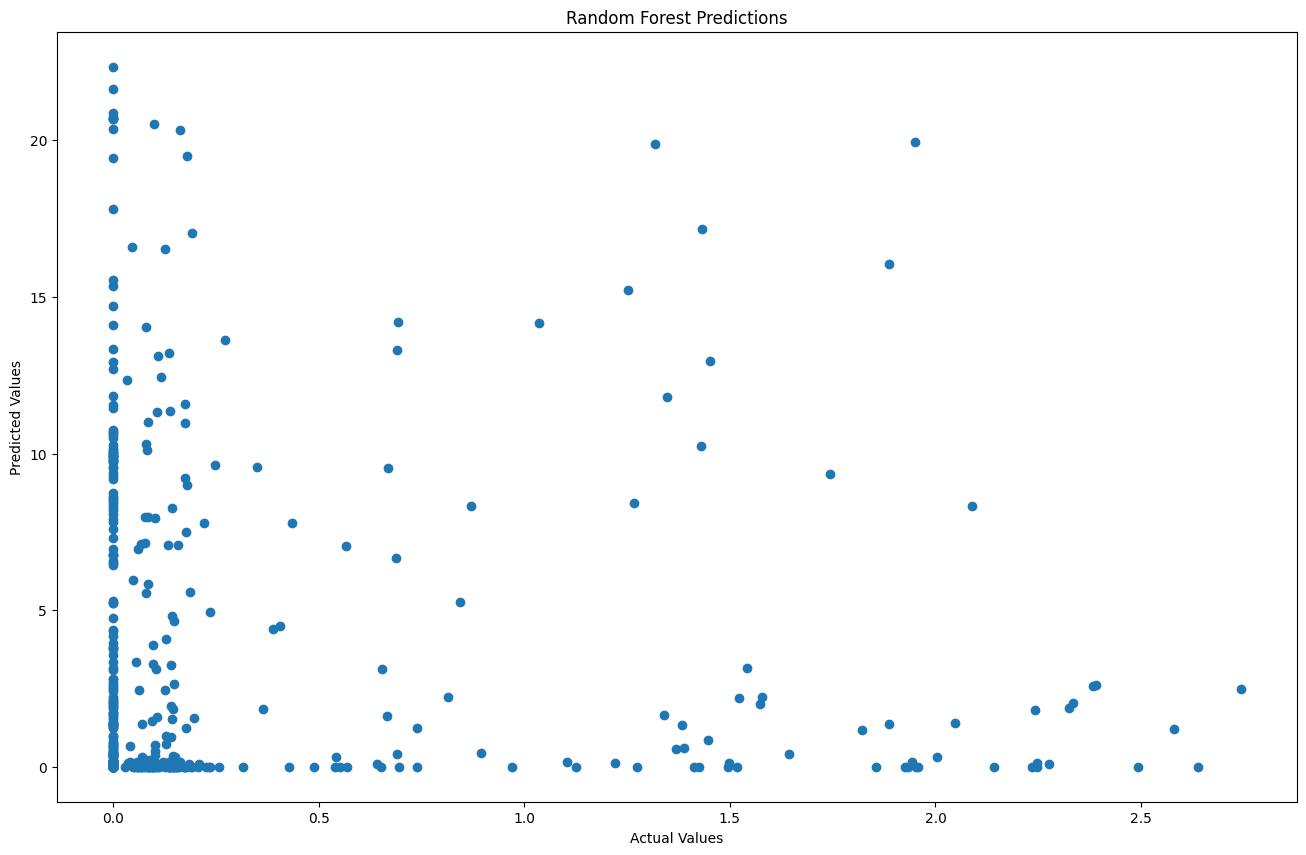

In [48]:
# scatter plot of actual vs predicted values
plt.figure(figsize=(16,10))
plt.scatter(y, rf_reg_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Random Forest Predictions')
plt.show()

## ML Summary


1. Its essential to know that the reason I chose a regression model, and not classification is because the target is a continuous variable, and not a binary.

2. The measure of identifying used were the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and a scatterplot for visualisation.

3. In this visualisation, we use a best-fit regression plot to determine the most preferred model.

4. The Decision Tree Regression model appears to be best, as the points are closely stacked, following a trend.

5. The reason for not using only the MSE to determine the best regression model, is because it can be negatively affected by outliers.